In [2]:
%matplotlib notebook

import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
variables = ['nTrackJetsOR', 'MV1cB1_cont', 'MV1cB2_cont', 'mBB', 'dRBB', 'pTB1',
             'pTB2', 'MET', 'dPhiVBB','dPhiLBmin', 'Mtop', 'dYWH', 'mTW', 'pTV']


dfBDT = pd.read_csv("Datasets/Plotcsv2.csv")
dfNN = pd.read_csv("Datasets/NNPlot2jet.csv")

dfBDT = dfBDT.sort_values('EventNumber')
dfNN = dfNN.sort_values('EventNumber')

dfBDT.reset_index(drop=True, inplace=True)
dfNN.reset_index(drop=True, inplace=True)

dfsortedBDT = dfBDT.sort_values('decision_value')
dfsortedNN = dfNN.sort_values('decision_value')

dfNN['Neural Net'] = dfNN['decision_value'].apply(lambda x: (x-0.5)*2)
dfBDT['BDT'] = dfBDT['decision_value']

ScoreBDT = dfBDT['BDT']
ScoreNN = dfNN['Neural Net']


BDT_back = (dfBDT.loc[dfBDT['Class'] == 0])['decision_value']
BDT_sig = (dfBDT.loc[dfBDT['Class'] == 1])['decision_value']

NN_back = (dfNN.loc[dfNN['Class'] == 0])['Neural Net']
NN_sig = (dfNN.loc[dfNN['Class'] == 1])['Neural Net']


BDT_backnum= (dfBDT.loc[dfBDT['Class'] == 0])['EventNumber']
BDT_signum = (dfBDT.loc[dfBDT['Class'] == 1])['EventNumber']

NN_backnum = (dfNN.loc[dfNN['Class'] == 0])['EventNumber']
NN_signum = (dfNN.loc[dfNN['Class'] == 1])['EventNumber']

print("Background Correlation:")
print(np.corrcoef(BDT_back, NN_back))

print("\n Signal Correlation:")
print(np.corrcoef(BDT_sig, NN_sig))

print("\n Overall Correlation:")
print(np.corrcoef(ScoreBDT, ScoreNN))


BDTcon = BDT_back.append(BDT_sig)
NNcon = NN_back.append(NN_sig)
print(np.corrcoef(BDTcon,NNcon))

Background Correlation:
[[1.         0.95951886]
 [0.95951886 1.        ]]

 Signal Correlation:
[[1.         0.91022064]
 [0.91022064 1.        ]]

 Overall Correlation:
[[1.         0.97234256]
 [0.97234256 1.        ]]
[[1.         0.98069251]
 [0.98069251 1.        ]]


In [4]:
BDTnp = dfBDT['EventNumber'].to_numpy()
NNnp = dfNN['EventNumber'].to_numpy()

for i in range(0,len(BDTnp)):       
    if BDTnp[i] != NNnp[i]:
        print(BDTnp[i], NNnp[i])


print("finished")

finished


<IPython.core.display.Javascript object>


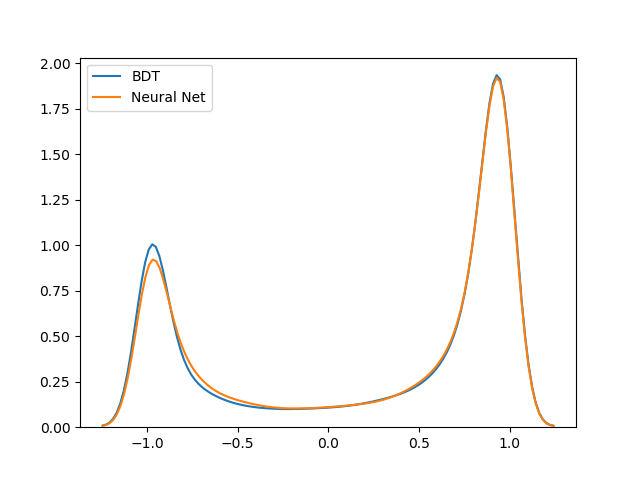

<IPython.core.display.Javascript object>


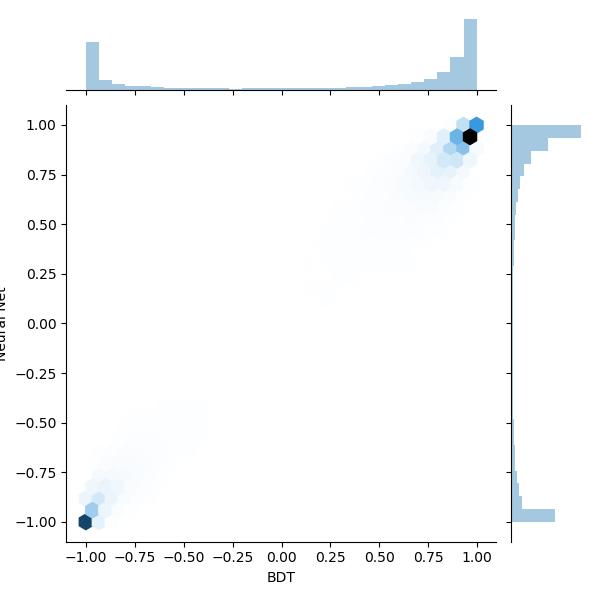

[[1.         0.97234256]
 [0.97234256 1.        ]]


In [33]:



plt.figure()
sns.kdeplot(ScoreBDT)
sns.kdeplot(ScoreNN)
#plt.savefig("DistComp.png")


sns.jointplot(ScoreBDT,ScoreNN,kind = 'hex')
#plt.savefig("DistScatter.png")

print(np.corrcoef(ScoreBDT,ScoreNN))

<IPython.core.display.Javascript object>


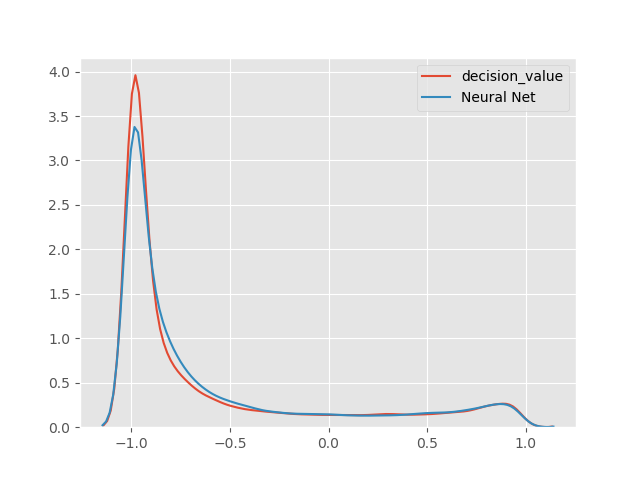

<IPython.core.display.Javascript object>


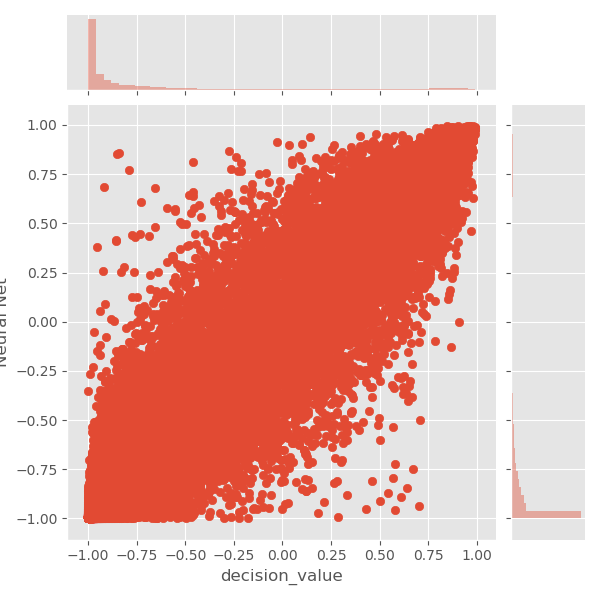

[[1.         0.95951886]
 [0.95951886 1.        ]]


In [42]:
plt.figure()
sns.kdeplot(BDT_back)
sns.kdeplot(NN_back)

sns.jointplot(BDT_back, NN_back)
print(np.corrcoef(BDT_back,NN_back))

<IPython.core.display.Javascript object>


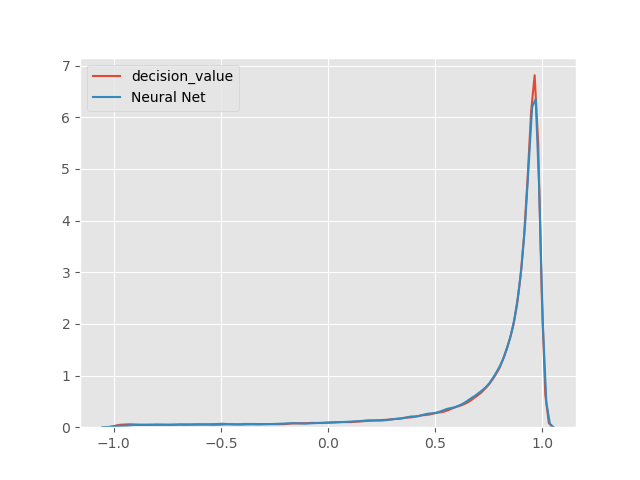

<IPython.core.display.Javascript object>


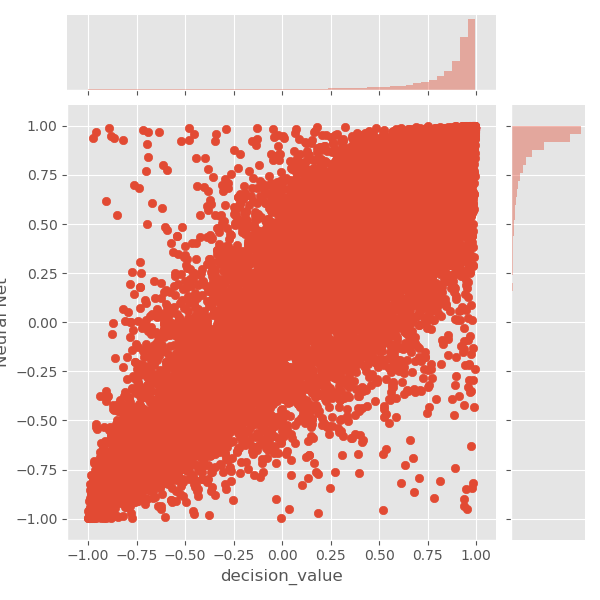

[[1.         0.91022064]
 [0.91022064 1.        ]]


In [43]:
plt.figure()
sns.kdeplot(BDT_sig)
sns.kdeplot(NN_sig)

sns.jointplot(BDT_sig, NN_sig)
print(np.corrcoef(BDT_sig,NN_sig))

<IPython.core.display.Javascript object>


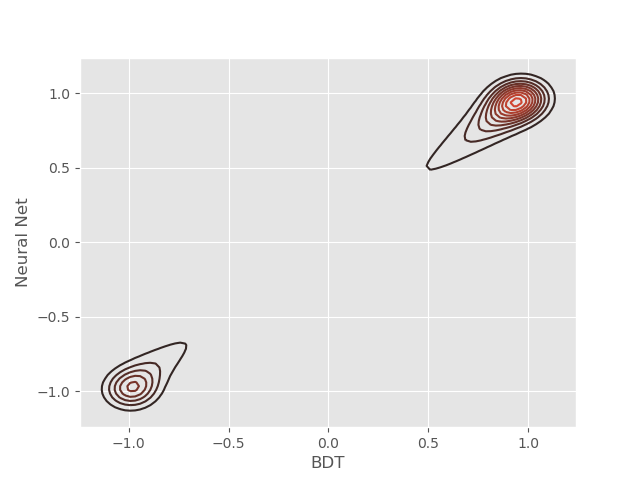

In [226]:
plt.figure()
sns.kdeplot(ScoreBDT, ScoreNN)

In [5]:
for var in variables:
    print(str(var) + " low: ", np.quantile(dfsortedBDT[str(var)], 0.05))
    print(str(var) + " high: ", np.quantile(dfsortedBDT[str(var)],0.95))
    print(str(var) + " mean: ", dfsortedBDT[str(var)].mean())
    print("\n")

nTrackJetsOR low:  0.0
nTrackJetsOR high:  1.0
nTrackJetsOR mean:  0.1752138787041887


MV1cB1_cont low:  -0.5577394664285
MV1cB1_cont high:  0.9999799132350001
MV1cB1_cont mean:  0.8662242294899645


MV1cB2_cont low:  -0.538112998009
MV1cB2_cont high:  0.999976813793
MV1cB2_cont mean:  0.8669829149939693


mBB low:  57735.669921875
mBB high:  337815.1484375
mBB mean:  146329.05566173766


dRBB low:  0.54823522269725
dRBB high:  2.953745663165
dRBB mean:  1.3525417449684716


pTB1 low:  99288.818359375
pTB1 high:  318679.4453125
pTB1 mean:  179996.409142161


pTB2 low:  23759.81152345
pTB2 high:  139284.76171875
pTB2 mean:  68224.0713478242


MET low:  28545.939941374996
MET high:  240037.0625
MET mean:  114494.68427688567


dPhiVBB low:  2.9885202646249995
dPhiVBB high:  3.1395932435999994
dPhiVBB mean:  3.094306354714766


dPhiLBmin low:  0.73212534189225
dPhiLBmin high:  2.9468700289724996
dPhiLBmin mean:  2.2392754940487056


Mtop low:  141644.1015625
Mtop high:  469067.9140625
Mto

In [21]:
def BDTdist(var,xrange,yrange):

    mva_type = ["BDT", "NN","dataset"]
    
    BDTs = []
    NNs = []
    raw_data = []
    
    for mva in mva_type:
        
        if mva == "BDT":
            df_low = dfsortedBDT.loc[dfsortedBDT['decision_value'] <= 0.8]
            df_high = dfsortedBDT.loc[dfsortedBDT['decision_value'] > 0.8]
            
        elif mva == "NN":
            df_low = dfsortedNN.loc[dfsortedNN['decision_value'] <= 0.8]
            df_high = dfsortedNN.loc[dfsortedNN['decision_value'] > 0.8]
        
            
            
    
        num_bin = 150
        bin_lims = np.linspace(xrange,yrange,num_bin+1)
        bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
        bin_widths = bin_lims[1:]-bin_lims[:-1]

        if mva == "dataset":
            signal = (dfBDT.loc[dfBDT['Class'] == 1])[str(var)]
            background = (dfBDT.loc[dfBDT['Class'] == 0])[str(var)]
            
            hist1, _ = np.histogram(signal, bins = bin_lims)
            hist2, _ = np.histogram(background, bins = bin_lims)
            
            hist_s = hist1/np.max(hist1)
            hist_b = hist2/np.max(hist2)
            
        
        
        else:
            signal_high = (df_high.loc[df_high['Class'] == 1])[str(var)]
            hist1, _ = np.histogram(signal_high, bins=bin_lims)

            signal_low = (df_low.loc[df_low['Class'] == 1])[str(var)] 
            hist2, _ = np.histogram(signal_low, bins=bin_lims)
    
            background_high = (df_high.loc[df_high['Class'] == 0])[str(var)]
            hist3, _ = np.histogram(background_high, bins= bin_lims)
    
            background_low = (df_low.loc[df_low['Class'] == 0])[str(var)]
            hist4, _ = np.histogram(background_low, bins= bin_lims)


            ##normalizing
            hist_s_high = hist1/np.max(hist1)
            hist_s_low = hist2/np.max(hist2)
            hist_b_high = hist3/np.max(hist3)
            hist_b_low = hist4/np.max(hist4)

        if mva == "BDT":
            #print("BDT works")
            BDTs.append(hist_s_high)
            BDTs.append(hist_s_low)
            BDTs.append(hist_b_high)
            BDTs.append(hist_b_low)
            
        elif mva == "NN":
            #print("NN works")
            NNs.append(hist_s_high)
            NNs.append(hist_s_low)
            NNs.append(hist_b_high)
            NNs.append(hist_b_low)
            
        else:
            raw_data.append(hist_s)
            raw_data.append(hist_b)
            

    plt.style.use('ggplot')
    #plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ###################################       
    ################################### 
        
    plt.figure(figsize = (10,15))
    
    
    ax1 = plt.subplot(3,1,1)
    plt.bar(bin_centers, raw_data[0], width = bin_widths, align = 'center', alpha = 1,
        label = "Raw Signal Distribution")

    plt.bar(bin_centers, raw_data[1], width = bin_widths, align = 'center', alpha = 0.75,
        label = "Raw Background Distribution")

    plt.legend()
    plt.xlim(xrange,yrange);
    plt.xlabel(str(var))
    plt.ylabel("Normalised Histogram Output")


    

    ##########################################
    
    plt.subplot(3,2,3, sharex = ax1, sharey = ax1)
    plt.bar(bin_centers, BDTs[0], width = bin_widths, align = 'center', alpha = 1,
        label = "High BDT output for Signal")

    plt.bar(bin_centers, BDTs[2], width = bin_widths, align = 'center', alpha = 0.75,
        label = "High BDT output for Background")

    plt.legend()
    plt.xlim(xrange,yrange);
    plt.xlabel(str(var))
    plt.ylabel("Normalised Histogram Output")


    plt.subplot(3,2,4, sharex = ax1, sharey = ax1)
    plt.bar(bin_centers, BDTs[1], width = bin_widths, align = 'center', alpha = 1,
        label = "Low BDT output for Signal")

    plt.bar(bin_centers, BDTs[3], width = bin_widths, align = 'center', alpha = 0.75,
        label = "Low BDT output for Background")
    plt.legend()
    plt.xlabel(str(var))
    plt.ylabel("Normalised Histogram Output");
    
    ##########################################
    
    plt.subplot(3,2,5)
    plt.bar(bin_centers, NNs[0], width = bin_widths, align = 'center', alpha = 1,
        label = "High NN output for Signal")

    plt.bar(bin_centers, NNs[2], width = bin_widths, align = 'center', alpha = 0.75,
        label = "High NN output for Background")

    plt.legend()
    plt.xlim(xrange,yrange);
    plt.xlabel(str(var))
    plt.ylabel("Normalised Histogram Output")


    plt.subplot(3,2,6, sharex = ax1, sharey = ax1)
    plt.bar(bin_centers, NNs[1], width = bin_widths, align = 'center', alpha = 1,
        label = "Low NN output for Signal")

    plt.bar(bin_centers, NNs[3], width = bin_widths, align = 'center', alpha = 0.75,
        label = "Low NN output for Background")
    plt.legend()
    plt.xlabel(str(var))
    plt.ylabel("Normalised Histogram Output");
    
    
    
    plt.savefig(str(var) + "_Distribution.png")
    

<IPython.core.display.Javascript object>


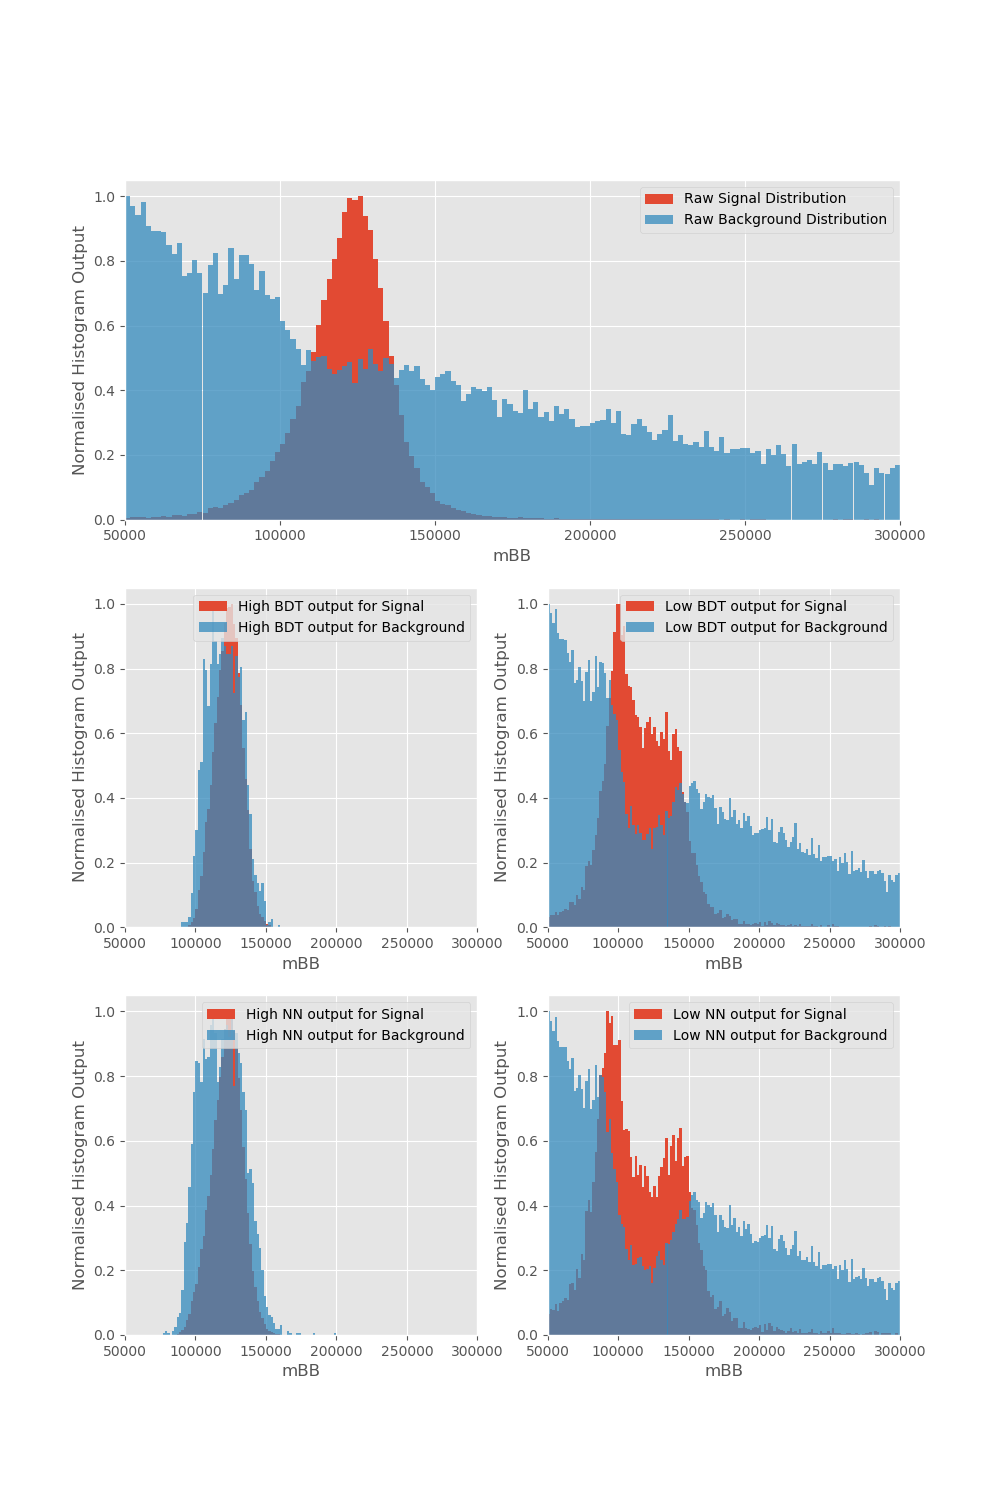

In [23]:
BDTdist("mBB",50000,300000)

<IPython.core.display.Javascript object>


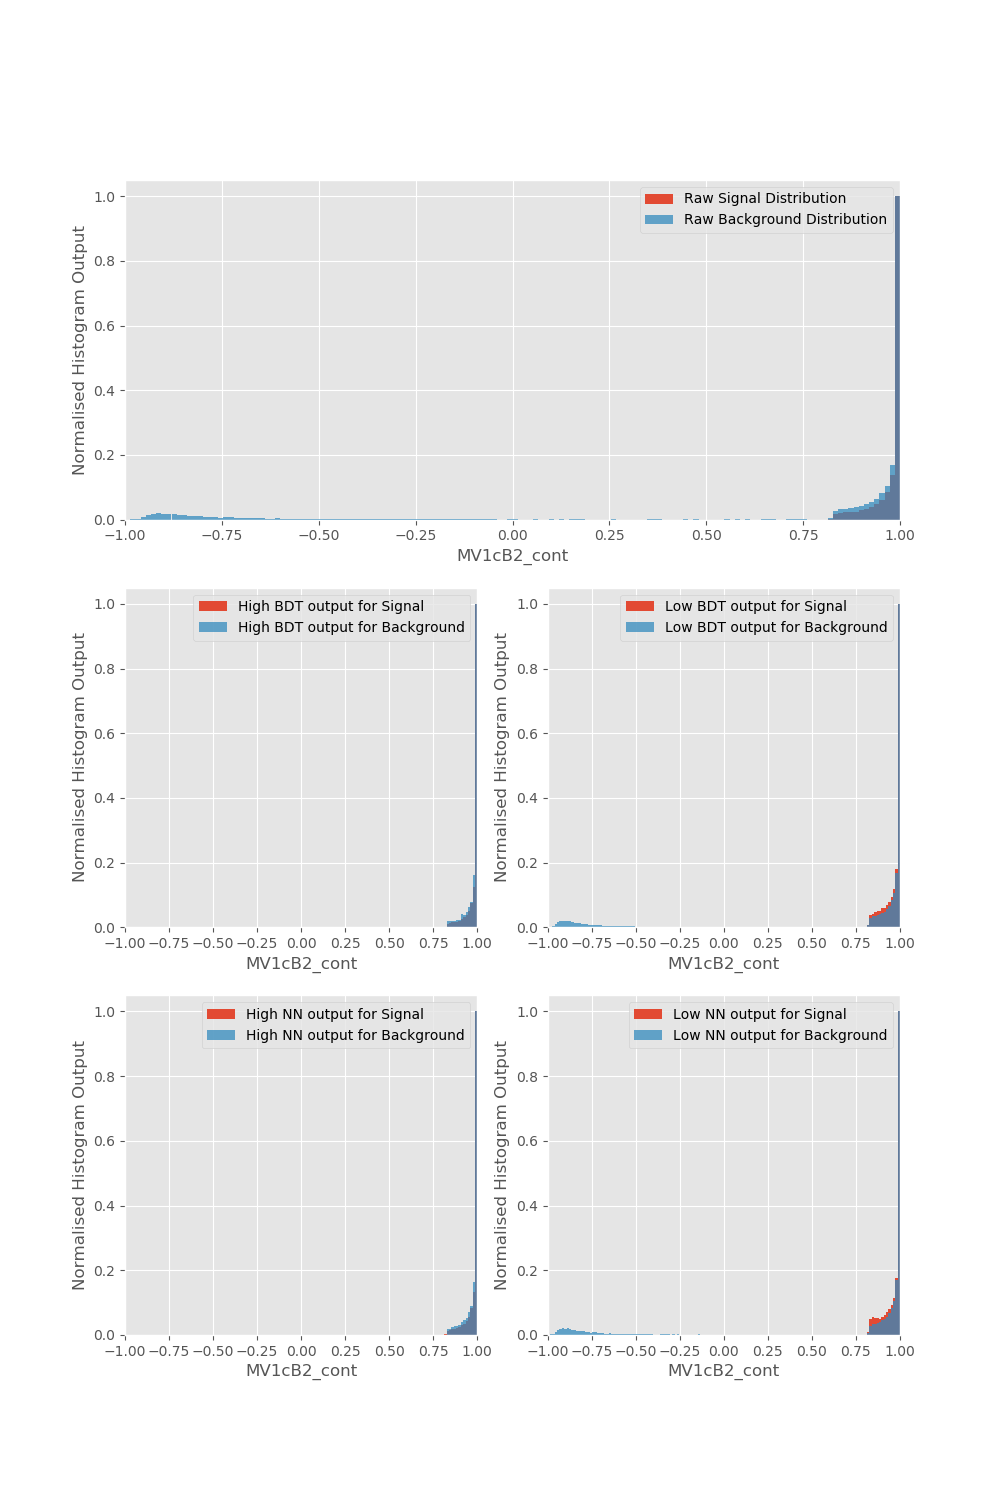

In [24]:
BDTdist("MV1cB2_cont",-1,1);

<IPython.core.display.Javascript object>


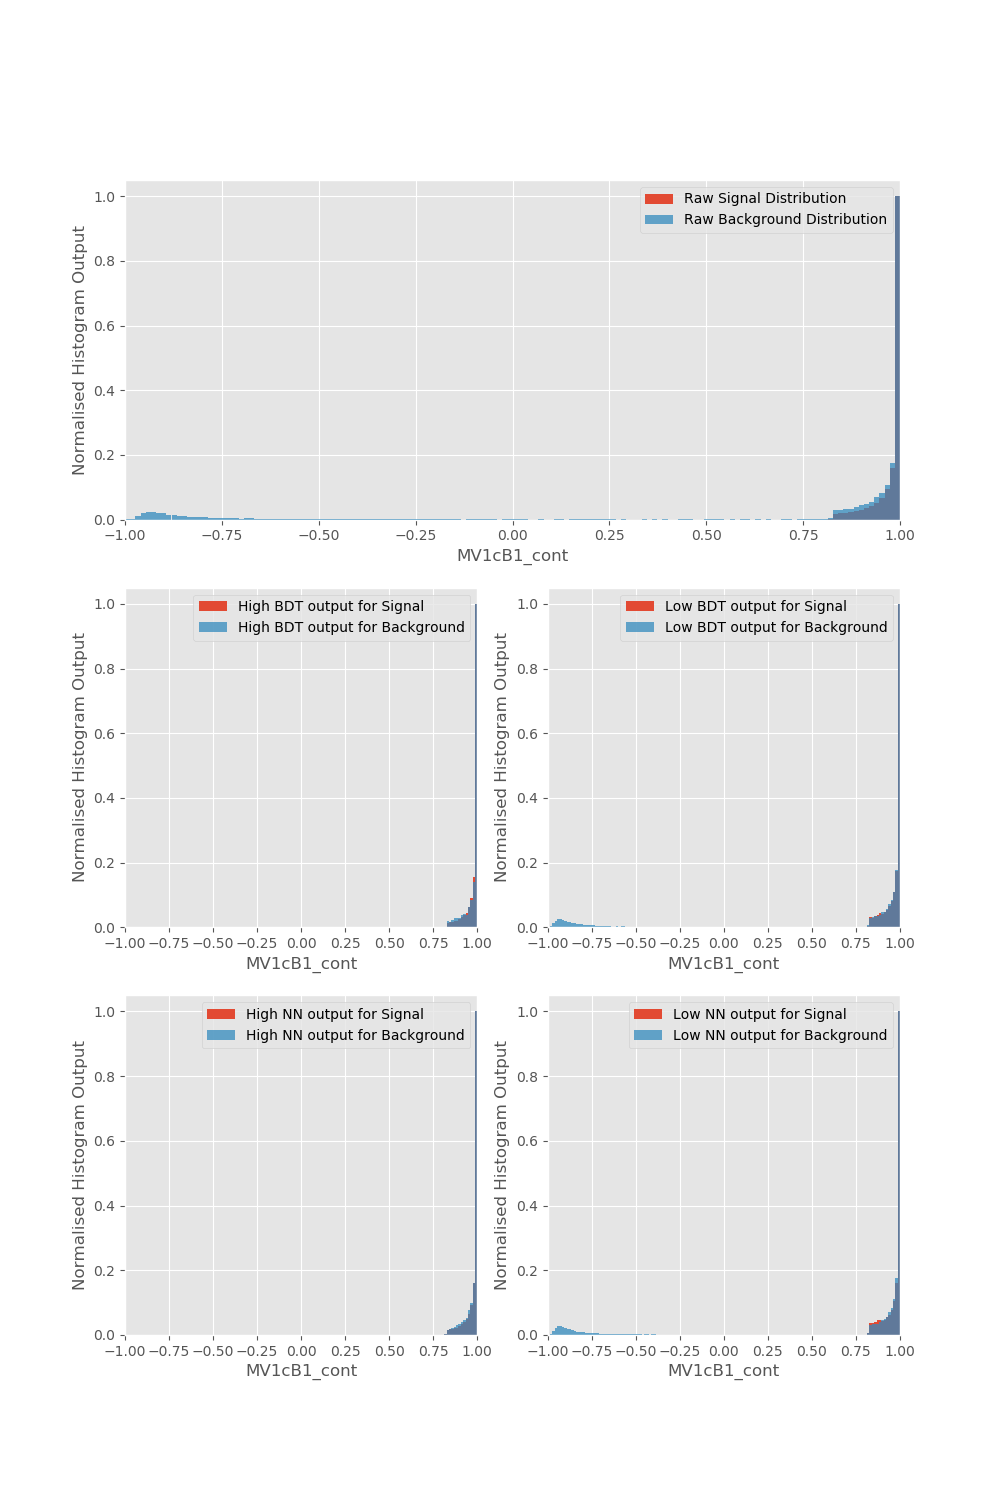

In [25]:
BDTdist("MV1cB1_cont",-1,1);

<IPython.core.display.Javascript object>


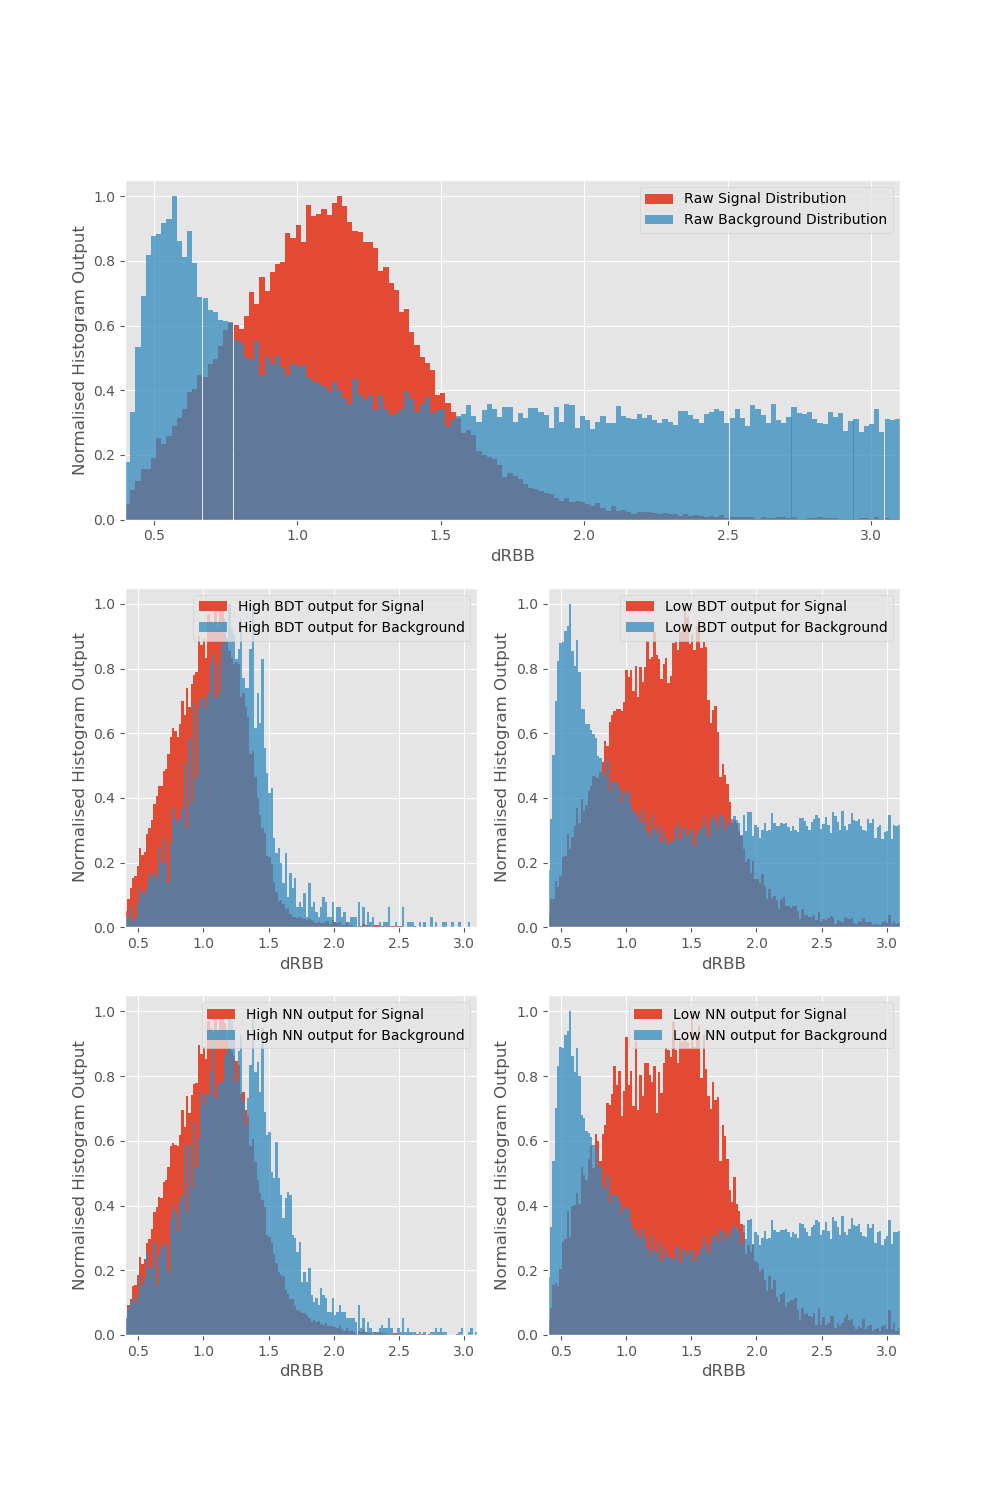

In [26]:
BDTdist("dRBB",0.4,3.1);

<IPython.core.display.Javascript object>


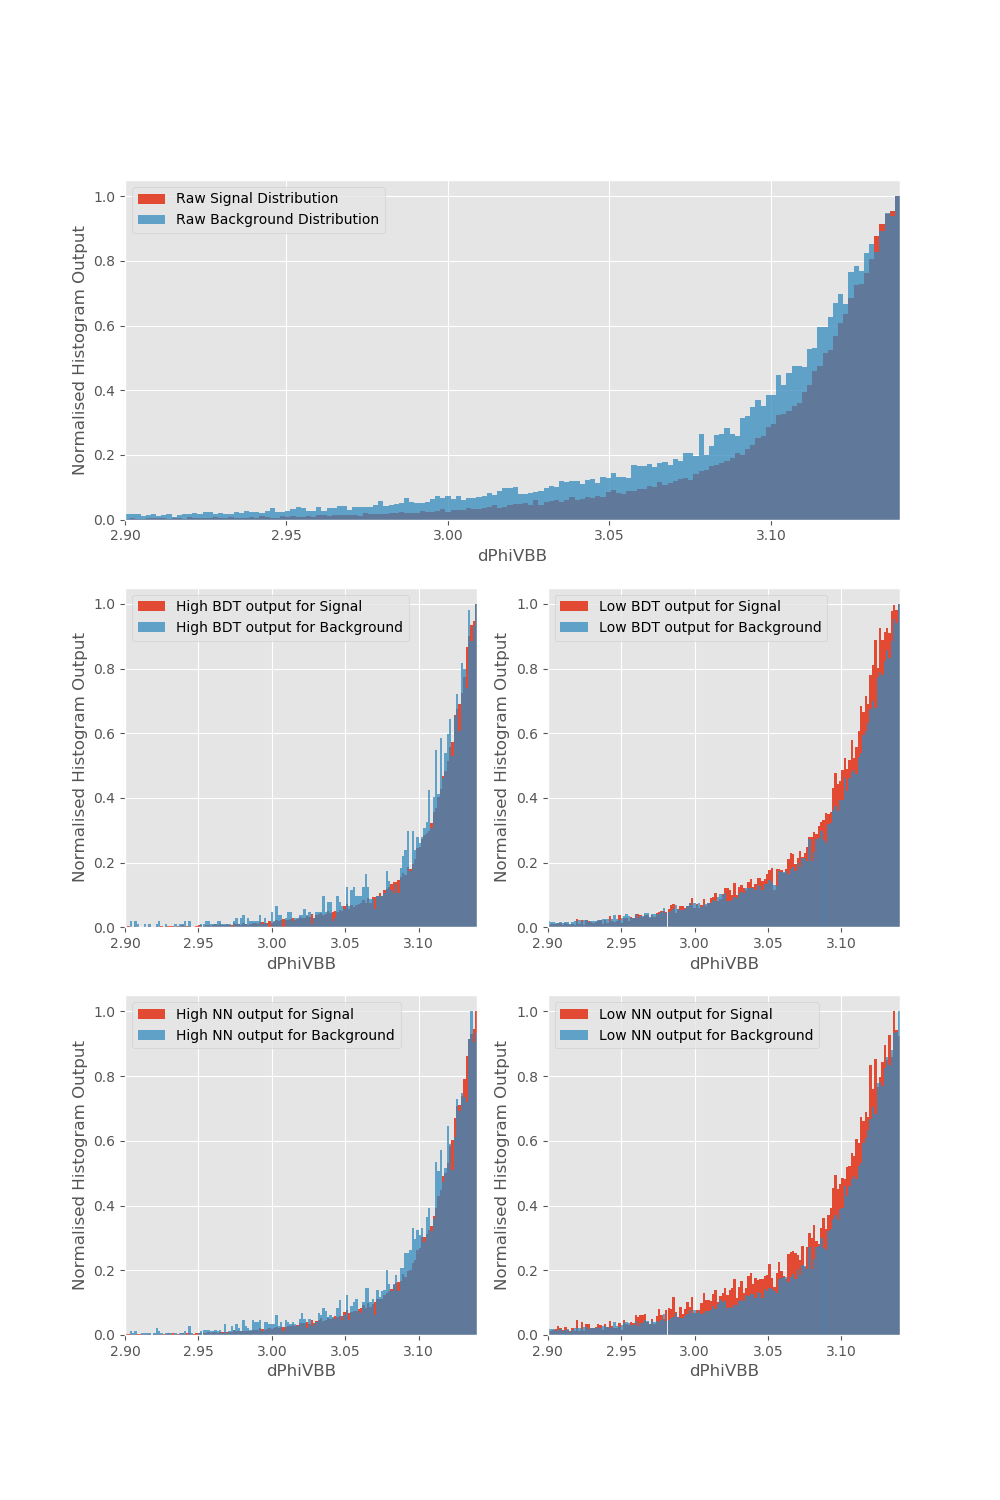

In [28]:
BDTdist("dPhiVBB",2.9,3.14);

<IPython.core.display.Javascript object>


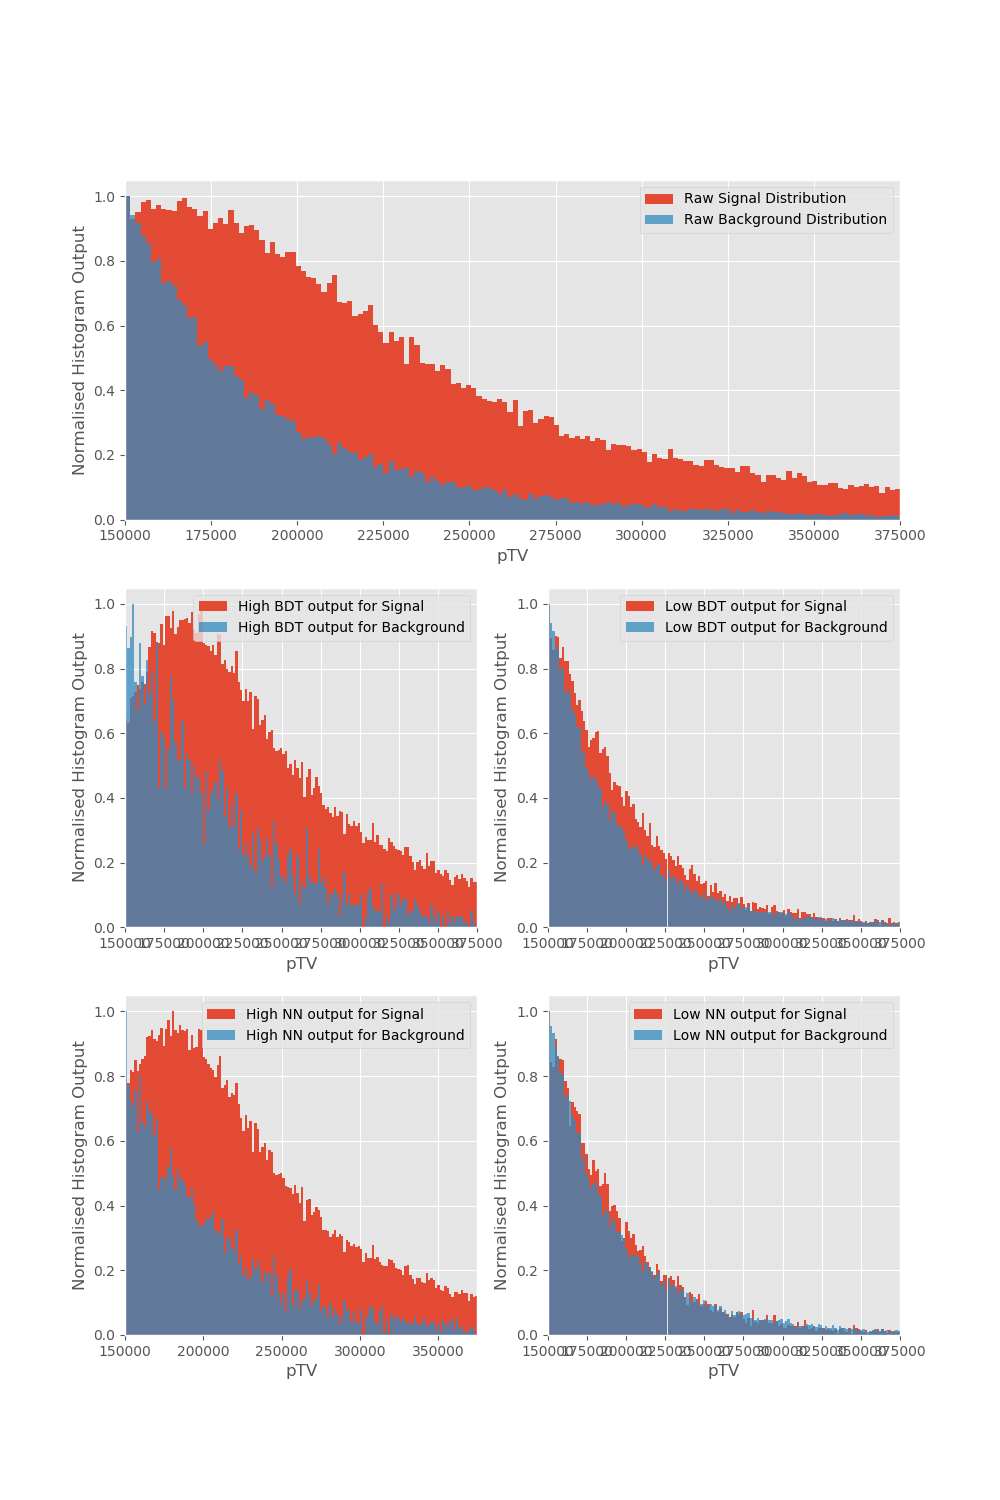

In [29]:
BDTdist("pTV",150000,375000)

<IPython.core.display.Javascript object>


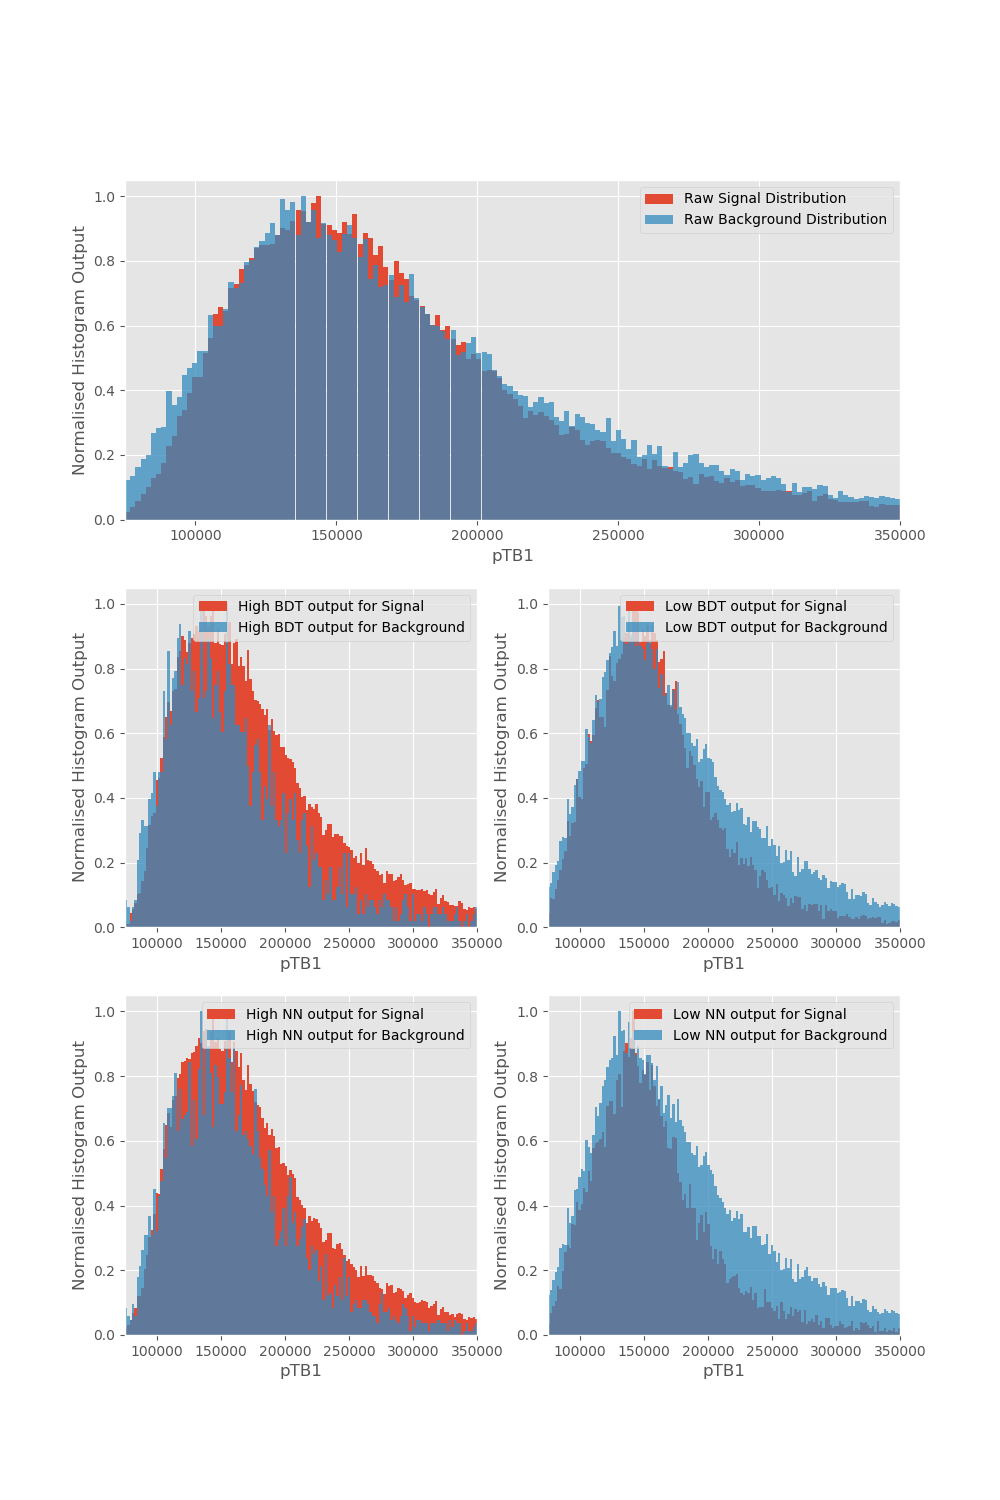

In [30]:
BDTdist("pTB1",75000,350000);

<IPython.core.display.Javascript object>


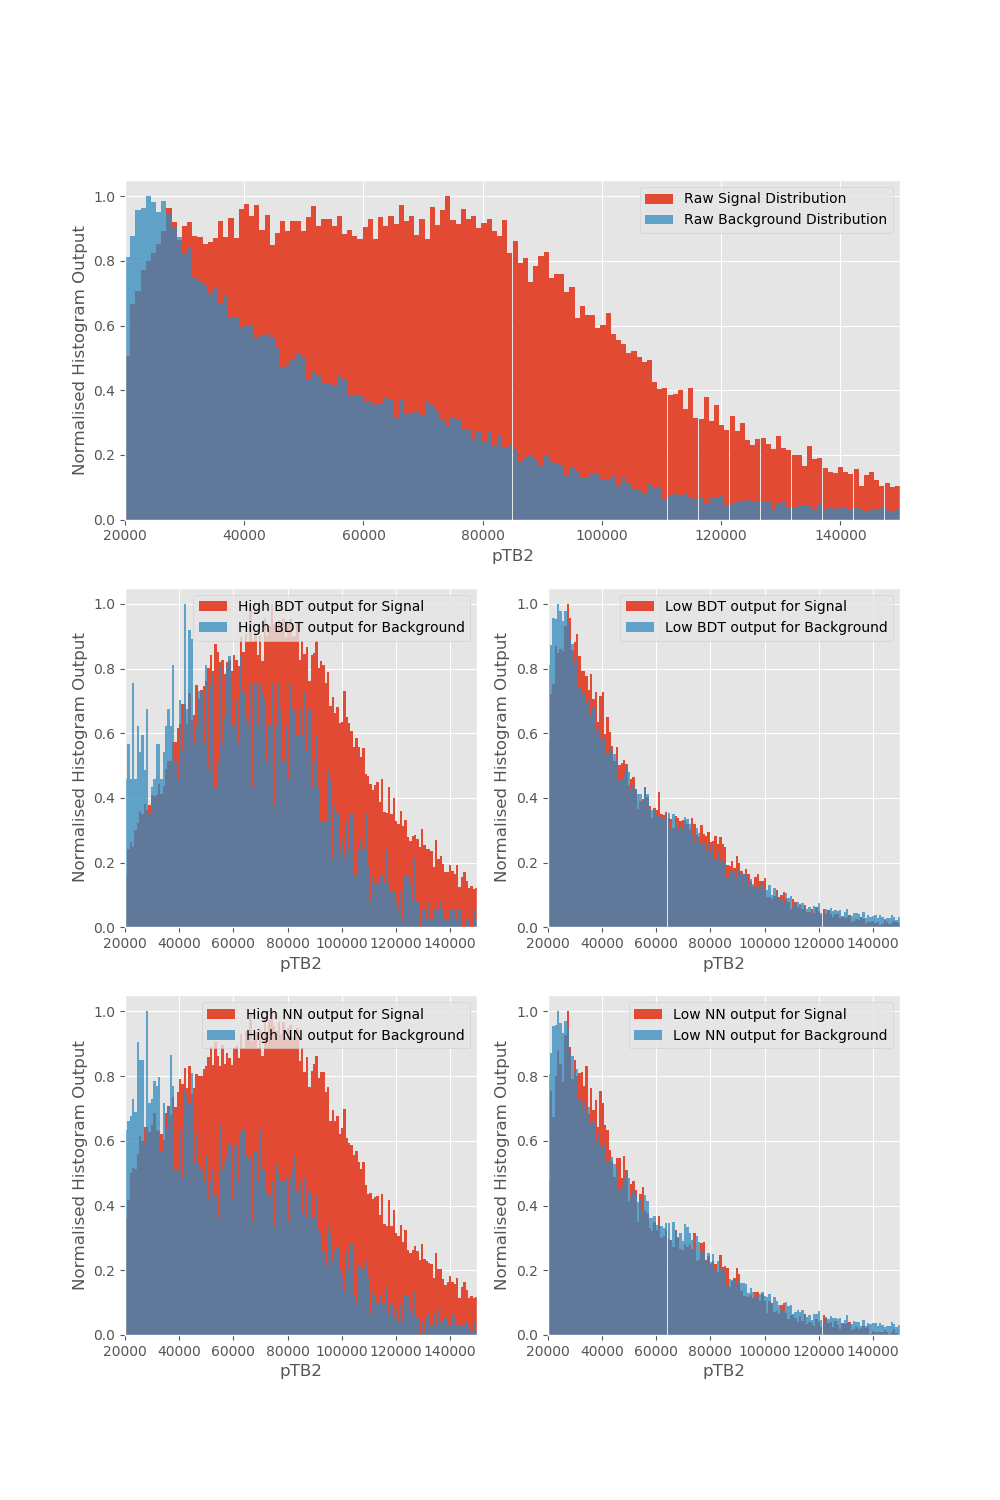

In [31]:
BDTdist("pTB2",20000,150000);

<IPython.core.display.Javascript object>


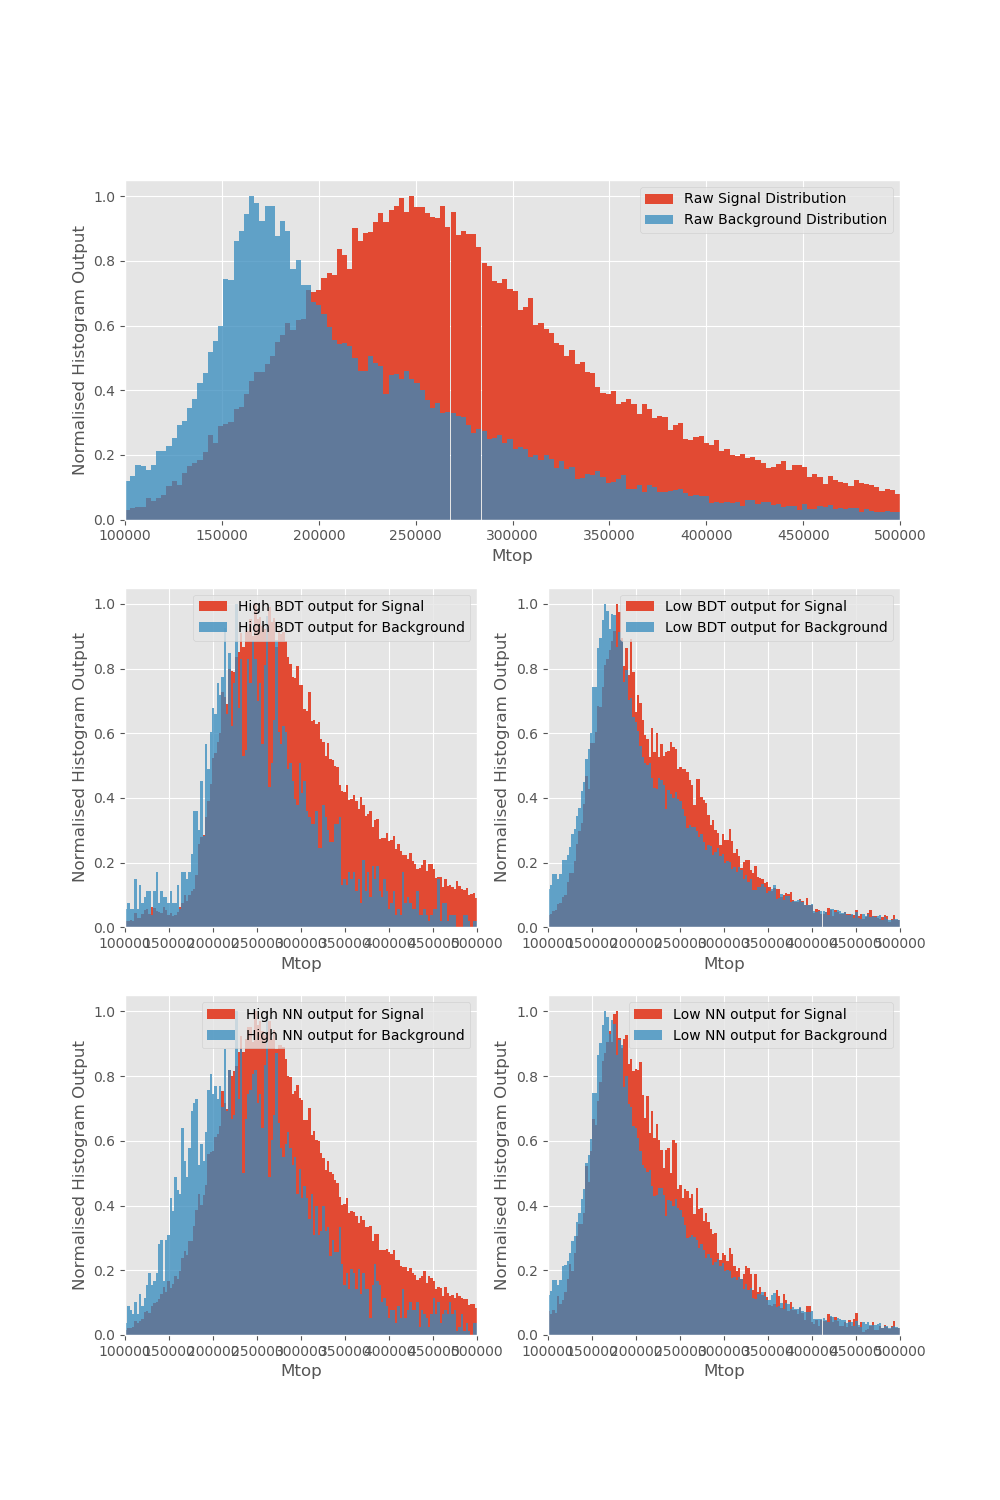

In [32]:
BDTdist("Mtop",100000,500000);